# Pospischil LA A type Example

### Install dependencies for ACT

In [1]:
!pip install act-neuron

### Setup base directory and download cells

In [2]:
import sys

# Download the repository with all relevant model files if in google colab
IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    !rm -rf ./ACT
    !git clone https://github.com/V-Marco/ACT
    base_dir = "./ACT"
else:
    base_dir = "../.."

### Define a config file

These settings are modifiable by the user of ACT. Tune your own cells by altering values here.

In [3]:
import os

import numpy as np

LA = {
    "cell": {
        "hoc_file": os.path.join(base_dir, "data/LA/A/template.hoc"),
        "modfiles_folder": os.path.join(base_dir, "data/LA/A/seg_modfiles"),
        "name": "Cell_A",
    },
    "simulation_parameters": {
        "h_v_init": -67.0,  # (mV)
        "h_tstop": 2000,  # (ms)
        "h_i_delay": 500,  # (ms)
        "h_i_dur": 1500,  # (ms)
        "h_dt": 0.025,
    },
    "optimization_parameters": {
        "amps": list(np.arange(-2, 10, 0.1)),
        "params": [
            {"channel": "g_pas", "low": 5.0e-06, "high": 2.0e-05},
            {"channel": "gnabar_hh2", "low": 2.5e-02, "high": 1.0e-01},
            {"channel": "gkbar_hh2", "low": 2.5e-03, "high": 1.0e-02},
            {"channel": "gkbar_im", "low": 1.5e-05, "high": 6.0e-05},
            {"channel": "gcabar_it", "low": 5.0e-04, "high": 2.0e-03},
        ],
        "target_V": None,  # Target voltages
        "target_params": [1e-5, 0.05, 0.005, 3e-5, 0.001],
        "num_repeats": 3,
        "num_amps_to_match": 12,
        "num_epochs": 5000,
    },
    "summary_features": {
        "spike_threshold": 20,  # (mV)
        # Target-sim match conditions (max abs diff between sim and target)
        "mc_num_spikes": 1,
        "mc_interspike_time": 200,  # (ms)
        "mc_min_v": 1,  # (mV)
        "mc_mean_v": 2,  # (mV)
        "mc_max_v": 1,  # (mV)
    },
    "segregation": [
        {
            "params": ["g_pas"],
            "voltage": [-100, -65],
            "time": [0, 500],
        },
        {
            "params": ["gnabar_hh2", "gkbar_hh2", "gkbar_im", "gcabar_it"],
            "voltage": [-65, 100],
            "time": [0, 2000],
        },
    ],
    "output": {"folder": "output_LA", "produce_plots": True},
    "run_mode": "segregated",  # "original", "segregated"
}

### Run the simulation

In [4]:
from act import simulator, analysis

simulator.run(LA)

/home/tyler/neuro-venv/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
Translating cadecay_destexhe.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/cadecay_destexhe.c
Translating HH_traub.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/HH_traub.c
Translating IM_cortex.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/IM_cortex.c
Notice: VERBATIM blocks are not thread safe
Thread Safe
Notice: This mechanism cannot be used with CVODE
Thread Safe
Translating IT_huguenard.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/IT_huguenard.c
Thread Safe


/home/tyler/git_stage/ACT/examples/Pospischil_sPYr
Mod files: "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/cadecay_destexhe.mod" "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/HH_traub.mod" "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/IM_cortex.mod" "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/IT_huguenard.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../../../data/Pospischil/sPyr/seg_modfiles/cadecay_destexhe.mod
 -> NMODL ../../../data/Pospischil/sPyr/seg_modfiles/HH_traub.mod
 -> NMODL ../../../data/Pospischil/sPyr/seg_modfiles/IM_cortex.mod
 -> NMODL ../../../data/Pospischil/sPyr/seg_modfiles/IT_huguenard.mod
 -> Compiling cadecay_destexhe.c
 -> Compiling IM_cortex.c
 -> Compiling HH_traub.c
 -> Compiling IT_huguenard.c
 => LINKING shared library ./libnrnmech.so
 => LINKING executable ./special LDFLAGS 

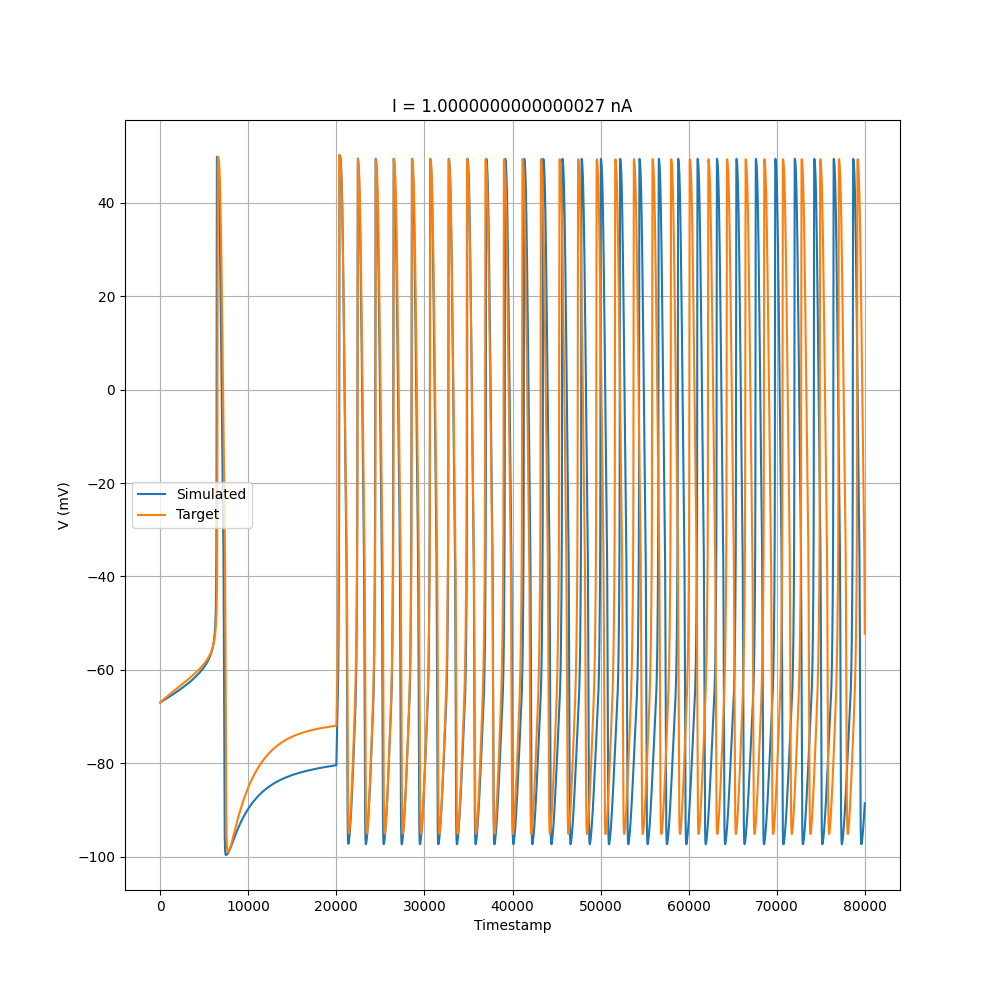

In [8]:
from IPython.display import Image

Image(filename="./output_LA/segregated/1000nA.png")

In [9]:
analysis.print_run_stats(LA)

output_Pospischil_sPYr : segregated
Med MSE: 1762.6290 (11269.1092)
Med Corr: 0.5394 (0.2470)
Pred MAE: 0.0041
----------



### Compare with the non-segregated approach

In [ ]:
# Update our config to use the original mod files
LA["cell"]["modfiles_folder"] = os.path.join(base_dir, "data/LA/A/orig_modfiles")

# Change the run mode to original (instead of segregated)
LA["run_mode"] = "original"

# Re-run

simulator.run(LA)

In [ ]:
Image(filename="./output_LA/original/1000nA.png")

In [9]:
analysis.print_run_stats(LA)

NameError: name 'analysis' is not defined